<a href="https://colab.research.google.com/github/sametmert03/ComputerVisionFiltering/blob/main/filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from IPython.core.display import Math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# DO NOT USE ANY BUILT-IN CONV. FUNCTIONS
verFilter = [[-1,-2,-1], [0,0,0], [1,2,1]]
horFilter = [[-1,0,1], [-2,0,2], [-1,0,1]]

def generalized_sobel(n, a):
  # write your sobel code here
  # input n, output is nxn differntial matrix
  #m = []
  k = np.zeros(n)
  p = [(j,i) for j in range(n[0]) 
          for i in range(n[1]) 
          if not (i == (n[1] -1)/2. and j == (n[0] -1)/2.)]

  for j, i in p:
      j_ = int(j - (n[0] -1)/2.)
      i_ = int(i - (n[1] -1)/2.)
      k[j,i] = (i if a==0 else j)/float(i_*i + j_*j_)
  return k


def my_conv(img, kernel):
  # write your convolution function
  x,y,z = img.shape 
  edgesImg = np.zeros_like(img)
  for row in range(3,x-2):
    for col in range(3,y-2):
      localPixels = img[row-1:row+2, col-1:col+2, 0]
      transformedPixels = kernel*localPixels
      score = (transformedPixels.sum())
      edgesImg[row, col] = score
  return edgesImg

def my_magnitude(img):
  gx = my_conv(img, horFilter)
  gy = my_conv(img, verFilter)
  gMagnitude = np.hypot(gx,gy)
  gMagnitude = gMagnitude / gMagnitude.max() * 255
  return gMagnitude 


def my_orientation(img):
  gx = my_conv(img, horFilter)
  gy = my_conv(img, verFilter)
  ori = np.arctan2(gx,gy)
  return ori 

def main():

  image = plt.imread("floyd.png")

  

main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


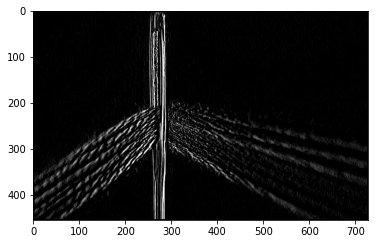

In [100]:
image = plt.imread("floyd.png")
plt.imshow(my_conv(image, horFilter))
plt.savefig("image_sx.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


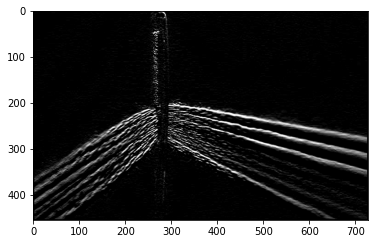

In [99]:
image = plt.imread("floyd.png")
plt.imshow(my_conv(image, verFilter))
plt.savefig("image_sy.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


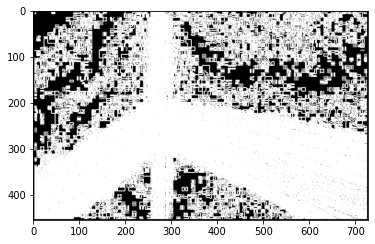

In [97]:
image = plt.imread("floyd.png")
plt.imshow(my_magnitude(image))
plt.savefig("image_grad.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


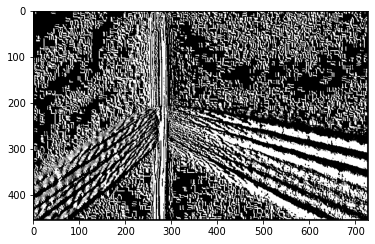

In [98]:
image = plt.imread("floyd.png")
plt.imshow(my_orientation(image))
plt.savefig("image_orient.png")